# Imports

In [215]:
from collections import defaultdict
import numpy as np
from copy import deepcopy
import random
import pickle
import matplotlib.pyplot as plt

In [2]:
from env import TicTacToe
from helpers import get_and_print_move, plot_board

# Пункт 1 Q learning 3x3

In [549]:
env = TicTacToe(3, 3, 3)

In [550]:
env.reset()

In [551]:
env.getState()

('111111111',
 array([[0, 0],
        [0, 1],
        [0, 2],
        [1, 0],
        [1, 1],
        [1, 2],
        [2, 0],
        [2, 1],
        [2, 2]]),
 1)

In [552]:
def get_empty_actions(state):
    state_array = np.array(list(state))
    return np.where(state_array == '1')[0]

def get_blocked_actions(state):
    state_array = np.array(list(state))
    return np.where(state_array != '1')[0]

In [ ]:
class Player:
    def __init__(self, lr, gamma, Q, epsilon) -> None:
        self.s = None
        self.a = None
        self.lr = lr
        self.gamma = gamma
        self.Q = Q
        self.epsilon = epsilon
        
    def update_Q(self, Q, next_s, next_a, r) -> None:
        if self.a is not None and self.s is not None:
            self.Q[self.s][self.a] = self.Q[self.s][self.a] + self.lr * (
                r + self.gamma * np.max(self.Q[next_s]) - self.Q[self.s][self.a])
        self.s = next_s
        self.a = next_a
            
    def get_action(self, s) -> int:
        if np.random.random() < self.epsilon:
            return random.choice(get_empty_actions(s))
        self.Q[s][get_blocked_actions(s)] = float("-Inf")
        return np.argmax(self.Q[s])
    
    def get_greedy_action(self, s) -> int:
        self.Q[s][get_blocked_actions(s)] = float("-Inf")
        return np.argmax(self.Q[s])

In [ ]:
class RandomPlayer:
    def __init__(self):
        ...
        
    def get_greedy_action(self, s) -> int:
        return random.choice(get_empty_actions(s))

In [198]:
class GameManager:
    
    def __init__(self, env):
        self.env = env
        lr = 0.03
        gamma = 0.8
        s, empty_spaces, turn =self.env.getState()
        self.Q = defaultdict(lambda: np.random.rand(len(empty_spaces)))
        self.players = [Player(lr, gamma, self.Q, 0.3), Player(lr, gamma, self.Q, 0.3)]
        
    def run_episode(self):
        self.env.reset()
        self.players[0].a = None
        self.players[1].a = None
        s, empty_spaces, turn =self.env.getState()
        done = False
        player_id = 0

        while not done:
            a = self.players[player_id].get_action(s)
            self.players[player_id].update_Q(Q, s, a, 0)
            player_id = 1 if player_id == 0 else 0 
            (s, empty_spaces, turn), r , done, _ = env.step(env.action_from_int(a))
        self.players[0].update_Q(Q, s, a, r) 
        self.players[1].update_Q(Q, s, a, -r)
        
    def evaluate_episode_with_random(self, random_player_id: int) -> float:
        self.env.reset()
        s, empty_spaces, turn =self.env.getState()
        done = False
        players_eval = deepcopy(self.players)
        players_eval[random_player_id] = RandomPlayer()
        player_id = 0
        while not done:
            a = players_eval[player_id].get_greedy_action(s)
            player_id = 1 if player_id == 0 else 0 
            (s, empty_spaces, turn), r , done, _ = env.step(env.action_from_int(a))
        return r

In [194]:
game_manager = GameManager(env)

In [195]:
eval_results_o = []
eval_results_x = []
for i in range(100):
    eval_x = []
    eval_o = []
    for _ in range(1000):
        game_manager.run_episode()
    for _ in range(100):
        eval_x.append(game_manager.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

0.72 -0.19
0.39 -0.38
0.44 -0.1
0.31 -0.26
0.61 -0.2
0.5 -0.13
0.65 -0.24
0.47 0.02
0.5 -0.17
0.59 0.11
0.59 0.02
0.57 -0.05
0.34 0.15
0.63 -0.12
0.73 0.13
0.48 0.05
0.82 0.05
0.84 -0.06
0.34 -0.0
0.85 -0.18
0.85 0.07
0.86 -0.16
0.81 -0.17
0.86 0.23
0.81 0.01
0.84 0.2
0.78 0.18
0.84 -0.0
0.8 -0.05
0.79 -0.04
0.94 0.01
0.87 -0.05
0.86 0.03
0.83 0.28
0.92 -0.01
0.81 0.04
0.9 0.16
0.83 0.09
0.87 -0.16
0.79 0.19
0.91 0.08
0.93 0.01
0.93 -0.16
0.93 -0.15
0.92 0.15
0.94 -0.05
0.91 0.08
0.93 0.08
0.83 0.06
0.98 0.04
0.91 -0.09
0.96 0.09
0.93 0.15
0.96 0.15
0.63 -0.06
0.74 0.09
0.94 0.17
0.84 0.04
0.86 0.13
0.87 0.05
0.89 0.05
0.9 -0.01
0.91 0.08
0.94 0.13
0.92 0.24
0.91 0.17
0.81 0.11
0.96 0.19
0.93 -0.0
0.75 0.07
0.91 0.14
0.48 0.05
0.74 0.11
0.6 0.16
0.77 0.06
0.66 0.01
0.65 0.06
0.67 0.11
0.5 0.25
0.64 0.08
0.72 0.05
0.68 0.18
0.6 0.1
0.4 0.16
0.66 0.3
0.63 0.28
0.68 0.22
0.61 0.12
0.57 0.26
0.72 -0.01
0.86 0.05
0.69 0.05
0.59 0.19
0.67 0.18
0.56 0.25
0.61 0.34
0.53 0.1
0.63 0.07
0.57 0.18

In [207]:
with open('q_dict.pkl', 'wb') as handle:
    pickle.dump(dict(game_manager.Q), handle, protocol=pickle.HIGHEST_PROTOCOL)

In [212]:
with open('q_dict.pkl', 'rb') as f:
    data_new = pickle.load(f)

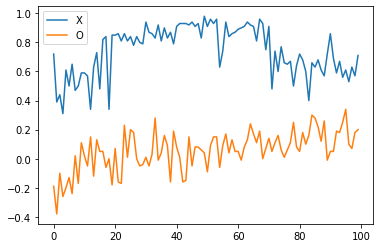

In [222]:
plt.plot(eval_results_x, label="X")
plt.plot(np.array(eval_results_o) * -1, label="O")
plt.legend()

## Q learning 4x4

In [223]:
env4 = TicTacToe(4, 4, 4)

In [ ]:
game_manager4 = GameManager(env4)

eval_results_o = []
eval_results_x = []
for i in range(100):
    eval_x = []
    eval_o = []
    for _ in range(2000):
        game_manager4.run_episode()
    for _ in range(100):
        eval_x.append(game_manager4.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager4.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

## Q learning 5x5

In [ ]:
env5 = TicTacToe(5, 5, 5)

In [ ]:
game_manager5 = GameManager(env5)

eval_results_o = []
eval_results_x = []
for i in range(100):
    eval_x = []
    eval_o = []
    for _ in range(4000):
        game_manager4.run_episode()
    for _ in range(100):
        eval_x.append(game_manager4.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager4.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

# Пункт 2

In [516]:
import dqn
import importlib
importlib.reload(dqn)

<module 'dqn' from '/mnt/c/Homeworks/rl_dl_made_homeworks/HW2/dqn.py'>

In [517]:
from dqn import DQN, ReplayMemory, Transition

In [536]:
def prepare_memory_s(s: str):
    return np.array(list(s)).astype(float).reshape(3, 3)

class PlayerDQN:
    def __init__(self, lr, gamma, model, memory, epsilon) -> None:
        self.s = None
        self.a = None
        self.lr = lr
        self.gamma = gamma
        self.model = model
        self.memory = memory
        self.epsilon = epsilon
        
    def update_memory(self, next_s, next_a, r) -> None:
        if self.a is not None and self.s is not None:
            mask = get_blocked_actions(s)
            self.memory.store((prepare_memory_s(self.s), self.a, prepare_memory_s(next_s), r, mask))
        self.s = next_s
        self.a = next_a
            
    def get_action(self, s) -> int:
        if np.random.random() < self.epsilon:
            return random.choice(get_empty_actions(s))
        s_tensor = torch.Tensor(prepare_memory_s(s)).view(-1, 1, 3, 3)
        actions = self.model(s_tensor)
        actions = actions.flatten()
        actions[get_blocked_actions(s)] = -999999999
        return actions.argmax()
    
    def get_greedy_action(self, s) -> int:
        s_tensor = torch.Tensor(prepare_memory_s(s)).view(-1, 1, 3, 3)
        actions = self.model(s_tensor)
        actions = actions.flatten()
        actions[get_blocked_actions(s)] = -999999999
        return actions.argmax()

In [540]:
class GameManagerDQN:
    
    def __init__(self, env, batch_size=256):
        self.batch_size = batch_size
        self.memory = ReplayMemory(10000)
        self.env = env
        s, empty_spaces, turn =self.env.getState()
        lr = 0.00001
        gamma = 0.8
        self.dqn = DQN(128, 3, (len(empty_spaces)), lr, gamma)
        self.players = [PlayerDQN(lr, gamma, self.dqn.model, self.memory, 0.3),
                        PlayerDQN(lr, gamma, self.dqn.model, self.memory, 0.3)]
        
        
    def run_episode(self):
        self.env.reset()
        self.players[0].a = None
        self.players[1].a = None
        s, empty_spaces, turn =self.env.getState()
        done = False
        player_id = 0

        while not done:
            a = self.players[player_id].get_action(s)
            self.players[player_id].update_memory(s, a, 0)
            player_id = 1 if player_id == 0 else 0 
            (s, empty_spaces, turn), r , done, _ = env.step(env.action_from_int(a))
        self.players[0].update_memory(s, a, r) 
        self.players[1].update_memory(s, a, -r)
        
    def update_weights(self) -> None:
        transitions = self.memory.sample(self.batch_size)
        self.dqn.train_step(transitions)
        
    def evaluate_episode_with_random(self, random_player_id: int) -> float:
        self.env.reset()
        s, empty_spaces, turn =self.env.getState()
        done = False
        players_eval = deepcopy(self.players)
        players_eval[random_player_id] = RandomPlayer()
        player_id = 0
        while not done:
            a = players_eval[player_id].get_greedy_action(s)
            player_id = 1 if player_id == 0 else 0 
            (s, empty_spaces, turn), r , done, _ = env.step(env.action_from_int(a))
        return r

In [541]:
env = TicTacToe(3, 3, 3)

In [542]:
STEPS_PER_UPDATE = 4
STEPS_PER_UPDATE_TARGET = 2000
game_manager_dqn = GameManagerDQN(env)
steps = 0
eval_results_o = []
eval_results_x = []
# fill reply memory
for _ in range(1000):
    game_manager_dqn.run_episode()
for i in range(100):
    eval_x = []
    eval_o = []
    for j in range(5000):
        game_manager_dqn.run_episode()
        steps += 1
        if steps % STEPS_PER_UPDATE == 0:
            game_manager_dqn.update_weights()
        if steps % STEPS_PER_UPDATE_TARGET == 0:
            game_manager_dqn.dqn.update_target_network()
    for _ in range(100):
        eval_x.append(game_manager_dqn.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager_dqn.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

Device: cpu
0.95 0.54
0.99 0.58
0.98 0.66
0.99 0.74
0.77 0.76
0.93 0.48


KeyboardInterrupt: 

In [547]:
with open("dqn_model.pth", "wb") as fp:
    torch.save(game_manager_dqn.dqn.model.state_dict(), fp)

In [548]:
with open("dqn_model.pth", "rb") as fp:
    state_dict = torch.load(fp, map_location="cpu")
game_manager_dqn.dqn.model.load_state_dict(state_dict)

<All keys matched successfully>

# end